In [20]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [21]:
p = stats.poisson(mu=1.410959)

In [22]:
x = np.arange(0,10); x
pmf = p.pmf(x)
pmf

array([2.43909262e-01, 3.44145968e-01, 2.42787926e-01, 1.14187936e-01,
       4.02786241e-02, 1.13662974e-02, 2.67289661e-03, 5.38763933e-04,
       9.50217275e-05, 1.48968624e-05])

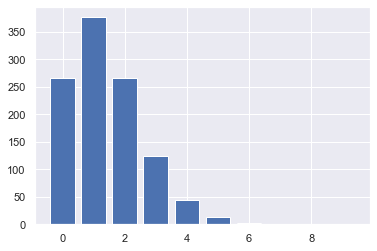

In [23]:
days = 365 * 3
plt.bar(x, pmf*days);

P(k>=7)

In [24]:
P7 = 1 - pmf[:7].sum()
P7

0.0006510895390415827

In [25]:
1./P7 

1535.887063201815

In [26]:
1 - p.cdf(6)

0.0006510895390416938

In [27]:
1 - p.cdf(7)

0.00011232560636753597

In [28]:
1./0.0007

1428.5714285714287

In [29]:
1/0.00065

1538.4615384615386

In [30]:
A = np.array([[0,1],[.3, .7]])
A

array([[0. , 1. ],
       [0.3, 0.7]])

In [31]:
A3 = A@A@A

In [32]:
x = np.array([1,0])

In [33]:
np.dot(x, A)

array([0., 1.])

In [34]:
S = A
for i in range(1000):
    S = S @ A
S

array([[0.23076923, 0.76923077],
       [0.23076923, 0.76923077]])

In [35]:
iprob = S[0]
iprob

array([0.23076923, 0.76923077])

In [36]:
A3

array([[0.21 , 0.79 ],
       [0.237, 0.763]])

In [37]:
# Prob: 0 -> 1 after 3 games
iprob[0] * A3[0,1]  + iprob[1]*A3[1,1]

0.769230769230768

In [38]:
import sys
sys.version

'3.7.5 (default, Nov  7 2019, 10:50:52) \n[GCC 8.3.0]'

In [39]:
import torch
torch.__version__

'1.6.0'

In [40]:
import torchvision
torchvision.__version__

'0.7.0'

In [41]:
import pytorch_lightning as pl
pl.__version__

'1.0.4'

In [42]:
import pl_bolts
pl_bolts.__version__

'0.2.5'

In [43]:
from pl_bolts.models.regression import LogisticRegression

In [44]:
from sklearn.datasets import load_iris

In [45]:
from pl_bolts.datamodules import SklearnDataModule

In [46]:
pl_bolts.__path__

['/usr/local/lib/python3.7/dist-packages/pl_bolts']

In [47]:
torch.__path__

['/home/yndk/.local/lib/python3.7/site-packages/torch']

In [ ]:
from pl_bolts.models.regression import LinearRegression
from pl_bolts.datamodules import SklearnDataModule
from sklearn.datasets import load_boston
import pytorch_lightning as pl

# sklearn dataset
X, y = load_boston(return_X_y=True)
loaders = SklearnDataModule(X, y)

model = LinearRegression(input_dim=13)

# try with gpus=4!
# trainer = pl.Trainer(gpus=4)
trainer = pl.Trainer(gpus=2, distributed_backend='ddp')
trainer.fit(model, loaders.train_dataloader(), loaders.val_dataloader())
trainer.test(test_dataloaders=loaders.test_dataloader())

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


In [15]:
import torch
import torchvision

In [16]:
from pl_bolts.models import VAE, GPT2, ImageGPT, PixelCNN
from pl_bolts.models.self_supervised import AMDIM, CPCV2, SimCLR, MocoV2
from pl_bolts.models import LinearRegression, LogisticRegression
from pl_bolts.models.gans import GAN
from pl_bolts.callbacks import PrintTableMetricsCallback
from pl_bolts.datamodules import FashionMNISTDataModule, CIFAR10DataModule, ImagenetDataModule

In [18]:
from pl_bolts.models.autoencoders import VAE
from pl_bolts.models.self_supervised import CPCV2

model1 = VAE(pretrained='imagenet2012')
encoder = model1.encoder
encoder.freeze()

# bolts are pretrained on different datasets
model2 = CPCV2(encoder='resnet18', pretrained='imagenet128').freeze()
model3 = CPCV2(encoder='resnet18', pretrained='stl10').freeze()

for (x, y) in own_data:
    features = encoder(x)
    feat2 = model2(x)
    feat3 = model3(x)


TypeError: __init__() missing 1 required positional argument: 'input_height'